<a href="https://colab.research.google.com/github/Hab-eeb/Data_Science_practice/blob/master/StageD/StageD_Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow 
print(tensorflow.__version__)

2.3.0


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras 

In [ ]:
%matplotlib inline

Getting Mnist dataset through sklearn then converting to dataframe

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")
X = mnist.data
y = mnist.target 

In [ ]:
Xd = pd.DataFrame(X)
yd = pd.DataFrame(y)

In [ ]:
mnist

Getting MNIST dataset from keras  

In [ ]:
mnist_K = keras.datasets.mnist 
(train_images,train_labels),(test_images,test_labels) = mnist_K.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
train_labels.shape

(60000,)

In [ ]:
class_labels = np.unique(train_labels)
print("The MNIST data set has {} labels, they are {}" .format(len(class_labels), (class_labels)))

The MNIST data set has 10 labels, they are [0 1 2 3 4 5 6 7 8 9]


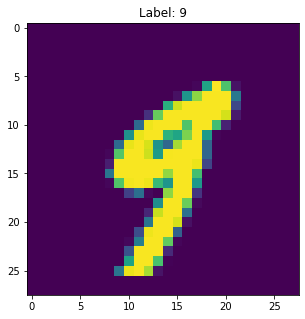

In [ ]:
plt.figure(figsize=(8,5))

plt.imshow(train_images[36000])
plt.title("Label: {}".format(train_labels[36000]))
plt.show()

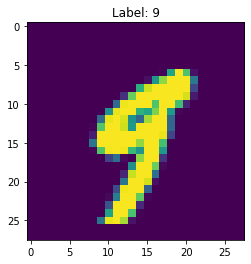

In [ ]:
some_num = X[36000]
shaped_some_num = some_num.reshape(28,28)

plt.imshow(shaped_some_num)
plt.title("Label: {}".format(y[36000]))
plt.show()

Scaling the training set from o to 255 to 0 to 1


In [ ]:
train_images = train_images / 255
test_images = test_images / 255

Splitting Training into training and validation

In [ ]:
train_images , val_images = train_images[:50000],train_images[50000:]
train_labels , val_labels = train_labels[:50000],train_labels[50000:]


In [ ]:
train_labels.shape

(50000,)

In [ ]:
val_images.shape

(10000, 28, 28)

Converting the image array from 28x28 to a single array


In [ ]:
new_dimension = np.prod(train_images.shape[1:])
new_dimension

784

In [ ]:
train_images = train_images.reshape(train_images.shape[0],new_dimension)
test_images = test_images.reshape(test_images.shape[0],new_dimension)
val_images = val_images.reshape(val_images.shape[0],new_dimension)


In [ ]:
val_images.shape

(10000, 784)

In [ ]:
test_images.shape

(10000, 784)

In [ ]:
train_images.shape

(50000, 784)

Converting the labels to binary encoding


In [ ]:
from tensorflow.keras.utils import to_categorical 
nos_labels = 10
train_labels = to_categorical(train_labels,nos_labels)
val_labels = to_categorical(val_labels,nos_labels)
test_labels = to_categorical(test_labels,nos_labels)

In [ ]:
val_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Construction phase of the multilayer perceptron


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder(tf.float32, [None,new_dimension])
Y = tf.placeholder(tf.float32,[None,nos_labels]) 

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
def multilayer_perceptron(X,no_classes, first_layer_neurons=256, second_layer_neurons=128):
  #first layer
  first_weights = tf.Variable(tf.random_uniform([new_dimension,first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(X,first_weights),first_bias))

  #second layer 
  second_weights =tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output,second_weights),second_bias))

  #output layer 
  final_weights = tf.Variable(tf.random_uniform([second_layer_neurons,no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output,final_weights),final_bias)

  return logits



Define the cost function and optimizer


In [ ]:
logits = multilayer_perceptron(X,nos_labels)

learning_rate = 0.01 

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
optimiserG = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_opp = optimiserG.minimize(loss_op)

Execution phase by initializing the variables and creationg a session to feed the values to the placeholders and then train the model


In [ ]:
init = tf.global_variables_initializer()
saver =tf.train.Saver()

epochs =20 
batch_size = 1000
iteration = len(train_images)/batch_size

#Training the model

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):

    average_cost =0
    start,end = 0, batch_size 

    for i in range(int(iteration)):
      batch_x,batch_y = train_images[start:end],train_labels[start:end]
      _,loss = sess.run([train_op,loss_op], feed_dict={X:batch_x,Y:batch_y})
      start += batch_size
      end   += batch_size 

      average_cost += loss/iteration
    print("Epoch =========={}".format(epoch))

  #Evaluation of the model 
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction,1),tf.argmax(Y,1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth,"float"))

  print("Accuracy: {}".format(accuracy.eval(feed_dict={X:test_images,Y:test_labels})))



Epoch ==========0
Epoch ==========1
Epoch ==========2
Epoch ==========3
Epoch ==========4
Epoch ==========5
Epoch ==========6
Epoch ==========7
Epoch ==========8
Epoch ==========9
Epoch ==========10
Epoch ==========11
Epoch ==========12
Epoch ==========13
Epoch ==========14
Epoch ==========15
Epoch ==========16
Epoch ==========17
Epoch ==========18
Epoch ==========19
Accuracy: 0.8950999975204468


In [ ]:
init = tf.global_variables_initializer()
saver =tf.train.Saver()

epochs =21
batch_size = 1000
iteration = len(train_images)/batch_size

#Training the model

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):

    average_cost =0
    start,end = 0, batch_size 

    for i in range(int(iteration)):
      batch_x,batch_y = train_images[start:end],train_labels[start:end]
      _,loss = sess.run([train_opp,loss_op], feed_dict={X:batch_x,Y:batch_y})
      start += batch_size
      end   += batch_size 

      average_cost += loss/iteration
    print("Epoch =========={}".format(epoch))

  #Evaluation of the model 
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction,1),tf.argmax(Y,1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth,"float"))

  print("Accuracy: {}".format(accuracy.eval(feed_dict={X:test_images,Y:test_labels})))


Epoch ==========0
Epoch ==========1
Epoch ==========2
Epoch ==========3
Epoch ==========4
Epoch ==========5
Epoch ==========6
Epoch ==========7
Epoch ==========8
Epoch ==========9
Epoch ==========10
Epoch ==========11
Epoch ==========12
Epoch ==========13
Epoch ==========14
Epoch ==========15
Epoch ==========16
Epoch ==========17
Epoch ==========18
Epoch ==========19
Epoch ==========20
Accuracy: 0.11349999904632568


In [ ]:
init = tf.global_variables_initializer()
saver =tf.train.Saver()

epochs =20 
batch_size = 1000
iteration = len(train_images)/batch_size

#Training the model

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):

    average_cost =0
    start,end = 0, batch_size 

    for i in range(int(iteration)):
      batch_x,batch_y = train_images[start:end],train_labels[start:end]
      _ = sess.run(train_op, feed_dict={X:batch_x,Y:batch_y})
      start += batch_size
      end   += batch_size 

      average_cost += loss/iteration
    print("Epoch =========={}".format(epoch))

  #Evaluation of the model 
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction,1),tf.argmax(Y,1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth,"float"))

  print("Accuracy: {}".format(accuracy.eval(feed_dict={X:test_images,Y:test_labels})))



Epoch ==========0
Epoch ==========1
Epoch ==========2
Epoch ==========3
Epoch ==========4
Epoch ==========5
Epoch ==========6
Epoch ==========7
Epoch ==========8
Epoch ==========9
Epoch ==========10
Epoch ==========11
Epoch ==========12
Epoch ==========13
Epoch ==========14
Epoch ==========15
Epoch ==========16
Epoch ==========17
Epoch ==========18
Epoch ==========19
Accuracy: 0.9089999794960022


In [ ]:
average_cost

5.986590862274174